**This project consist of a Jupyter notebook that 1)Scrapes PokemonDB for the data of all pokemon thus far, 2)outputs the data to a CSV file, and 3) create data visdualizations with said data.**

**1. Import everything we need.**

In [389]:
from requests import get
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import re
reload(sys)
sys.setdefaultencoding('utf-8')
%matplotlib inline

**2. Create a response object and check status of url. 200 = Connection is good.**

In [390]:
url = 'https://pokemondb.net/pokedex/all'
response = get(url)
response.status_code

200

**3. Create a bs4 soup object using BeautifulSoup, and passing in our response object + 'lxml' parser.**

In [391]:
soup = BeautifulSoup(response.content, 'lxml')
type(soup)

bs4.BeautifulSoup

**4. Create a rows variable to store all the table rows.<br>
If the website had multiple tables or other 'tr' classes, we would have to create a container to<br>
hold all the rows and then create a rows variable by using find_all on container. In this case,<br> 
there is only one table that holds all the 'tr' tags.**

In [392]:
rows = soup.find_all('tr')

**5. Create empty lists of each column, and itterate through the rows variable skipping the first one ([1:]) <br>
a) Set 'col' variable to all the 'td' tags contained in each row in rows.<br>
b) Set each column to its appropriate name, get the text, and then append it to the appropriate<br> 
empty list.<br>
6.Create a list for the average of all stats of each pokemon by converting the list of totals in<br> integers and dividing by 6.**

In [393]:
numbers = []
names = []
types = []
hps = []
attacks = []
defenses = []
sp_attks = []
sp_defs = []
speeds = []
totals = []
st_avgs = []

for row in rows[1:]:
    col = row.find_all('td')
    
    num = col[0].text
    numbers.append(num)
   
    name = col[1].text
    names.append(name)
    
    poke_type = col[2].text
    types.append(poke_type)
    
    hp = col[4].text
    hps.append(hp)
    
    attack = col[5].text
    attacks.append(attack)
    
    defense = col[6].text
    defenses.append(defense)
    
    spa = col[7].text
    sp_attks.append(spa)
    
    spd = col[8].text
    sp_defs.append(spd)
    
    speed = col[9].text
    speeds.append(speed)
    
    total = col[3].text
    totals.append(total)
    
    st_avg = int(col[3].text)/6
    st_avgs.append(st_avg)

**7. Create Pandas DataFrame using the lists of data scraped from website, by entering the lists into pandas as a dictionary. Output the first 5 records with .head().**

In [394]:
poke_df = pd.DataFrame({'NationalNo':numbers,
                        'Name':names,
                        'Type':types,
                        'HP':hps,
                       'Attack':attacks,
                       'Defense':defenses,
                       'Sp_Atk':sp_attks,
                       'Sp_Def':sp_defs,
                       'Speed':speeds,
                        'Total':totals, 
                        'Stat_Avg':st_avgs,
                       })
poke_df.head()

,Attack,Defense,HP,Name,NationalNo,Sp_Atk,Sp_Def,Speed,Stat_Avg,Total,Type
0,49,49,45,Bulbasaur,001,65,65,45,53,318,Grass Poison
1,62,63,60,Ivysaur,002,80,80,60,67,405,Grass Poison
2,82,83,80,Venusaur,003,100,100,80,87,525,Grass Poison
3,100,123,80,Venusaur Mega Venusaur,003,122,120,80,104,625,Grass Poison
4,52,43,39,Charmander,004,60,50,65,51,309,Fire


**8. Columns seem out of place, so we reoder them.**
- Using df = df[['column0','column1','column2'....'etc']]

In [395]:
poke_df = poke_df[['NationalNo','Name','Type','HP','Attack','Defense','Sp_Atk','Sp_Def','Speed','Total','Stat_Avg']]

In [396]:
poke_df.head()

,NationalNo,Name,Type,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Total,Stat_Avg
0,001,Bulbasaur,Grass Poison,45,49,49,65,65,45,318,53
1,002,Ivysaur,Grass Poison,60,62,63,80,80,60,405,67
2,003,Venusaur,Grass Poison,80,82,83,100,100,80,525,87
3,003,Venusaur Mega Venusaur,Grass Poison,80,100,123,122,120,80,625,104
4,004,Charmander,Fire,39,52,43,60,50,65,309,51


**9. Split the primary and secondary types.**

In [397]:
def camelcase_split(string):
    split_string = re.sub('([a-z])([A-Z])', r'\1 \2', string).split()
    return split_string

In [398]:
poke_df['Type'] = poke_df.Type.apply(camelcase_split)

In [399]:
poke_df.head()

,NationalNo,Name,Type,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Total,Stat_Avg
0,001,Bulbasaur,"[Grass, Poison]",45,49,49,65,65,45,318,53
1,002,Ivysaur,"[Grass, Poison]",60,62,63,80,80,60,405,67
2,003,Venusaur,"[Grass, Poison]",80,82,83,100,100,80,525,87
3,003,Venusaur Mega Venusaur,"[Grass, Poison]",80,100,123,122,120,80,625,104
4,004,Charmander,[Fire],39,52,43,60,50,65,309,51


**10. Create a function that takes an argument and checks if the length is equal to 1.<br>
If so, it adds a 'None' to the list values, so we have 2 elements in each list.**

In [400]:
def add_none(type_2):
    if len(type_2) == 1:
        type_2.append('None')
    return type_2 

In [401]:
poke_df.head()

,NationalNo,Name,Type,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Total,Stat_Avg
0,001,Bulbasaur,"[Grass, Poison]",45,49,49,65,65,45,318,53
1,002,Ivysaur,"[Grass, Poison]",60,62,63,80,80,60,405,67
2,003,Venusaur,"[Grass, Poison]",80,82,83,100,100,80,525,87
3,003,Venusaur Mega Venusaur,"[Grass, Poison]",80,100,123,122,120,80,625,104
4,004,Charmander,[Fire],39,52,43,60,50,65,309,51


**11. Apply Function**

In [402]:
poke_df['Type'] = poke_df.Type.apply(add_none)
poke_df.head()

,NationalNo,Name,Type,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Total,Stat_Avg
0,001,Bulbasaur,"[Grass, Poison]",45,49,49,65,65,45,318,53
1,002,Ivysaur,"[Grass, Poison]",60,62,63,80,80,60,405,67
2,003,Venusaur,"[Grass, Poison]",80,82,83,100,100,80,525,87
3,003,Venusaur Mega Venusaur,"[Grass, Poison]",80,100,123,122,120,80,625,104
4,004,Charmander,"[Fire, None]",39,52,43,60,50,65,309,51


**12. We take the 'Type' column of DataFrame and set it equal to a variable. <br>
Then use a for loop to go through each row and add i[0] and i[1] to two seperate lists that we <br>
will use as new columns.**

In [403]:
type1_2 = poke_df['Type']
#split_cols
type_1 = []
type_2 = []
for i in type1_2:
    type_1.append(i[0])
    type_2.append(i[1])

**13. Insert the two new collumns.**

In [404]:
idx = 2
poke_df.insert(loc=idx,column='Type_1',value=type_1)
poke_df.insert(loc=idx,column='Type_2',value=type_2)

In [405]:
poke_df.head()

,NationalNo,Name,Type_2,Type_1,Type,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Total,Stat_Avg
0,001,Bulbasaur,Poison,Grass,"[Grass, Poison]",45,49,49,65,65,45,318,53
1,002,Ivysaur,Poison,Grass,"[Grass, Poison]",60,62,63,80,80,60,405,67
2,003,Venusaur,Poison,Grass,"[Grass, Poison]",80,82,83,100,100,80,525,87
3,003,Venusaur Mega Venusaur,Poison,Grass,"[Grass, Poison]",80,100,123,122,120,80,625,104
4,004,Charmander,None,Fire,"[Fire, None]",39,52,43,60,50,65,309,51


**14. Final Reorder.**

In [406]:
poke_df = poke_df[['NationalNo','Name','Type','Type_1','Type_2','HP','Attack','Defense','Sp_Atk','Sp_Def','Speed','Total','Stat_Avg']]
poke_df.head()

,NationalNo,Name,Type,Type_1,Type_2,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Total,Stat_Avg
0,001,Bulbasaur,"[Grass, Poison]",Grass,Poison,45,49,49,65,65,45,318,53
1,002,Ivysaur,"[Grass, Poison]",Grass,Poison,60,62,63,80,80,60,405,67
2,003,Venusaur,"[Grass, Poison]",Grass,Poison,80,82,83,100,100,80,525,87
3,003,Venusaur Mega Venusaur,"[Grass, Poison]",Grass,Poison,80,100,123,122,120,80,625,104
4,004,Charmander,"[Fire, None]",Fire,None,39,52,43,60,50,65,309,51


**Optional: Remove the origional 'Type' column.**

In [407]:
#poke_df.drop('Type', axis=1, inplace=True)

**15. Export as CSV. Use "encoding='utf-8" to remove the 'u' from the Type list.**

In [408]:
poke_df.to_csv('poke_data.csv', encoding='utf-8')

In [409]:
poke_df.head()

,NationalNo,Name,Type,Type_1,Type_2,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Total,Stat_Avg
0,001,Bulbasaur,"[Grass, Poison]",Grass,Poison,45,49,49,65,65,45,318,53
1,002,Ivysaur,"[Grass, Poison]",Grass,Poison,60,62,63,80,80,60,405,67
2,003,Venusaur,"[Grass, Poison]",Grass,Poison,80,82,83,100,100,80,525,87
3,003,Venusaur Mega Venusaur,"[Grass, Poison]",Grass,Poison,80,100,123,122,120,80,625,104
4,004,Charmander,"[Fire, None]",Fire,None,39,52,43,60,50,65,309,51


**16. Plot a Histogram that shows the distribution of total pokemon stats including labels.**

(array([ 14.,  18.,  37.,  58., 113.,  69.,  37.,  72.,  70.,  77., 170.,
        107.,  34.,  44.,  52.,  11.,   7.,  28.,   3.,   1.,   5.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([ 175.    ,  204.6875,  234.375 ,  264.0625,  293.75  ,  323.4375,
         353.125 ,  382.8125,  412.5   ,  442.1875,  471.875 ,  501.5625,
         531.25  ,  560.9375,  590.625 ,  620.3125,  650.    ,  679.6875,
         709.375 ,  739.0625,  768.75  ,  798.4375,  828.125 ,  857.8125,
         887.5   ,  917.1875,  946.875 ,  976.5625, 1006.25  , 1035.9375,
        1065.625 , 1095.3125, 1125.    ]),
 <a list of 32 Patch objects>)

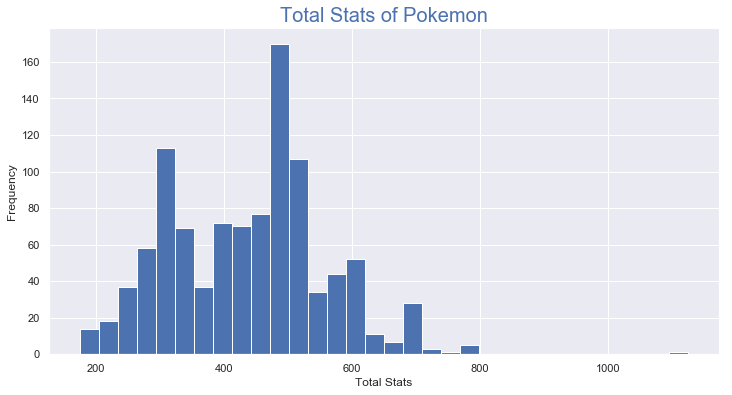

In [410]:
sns.set()
poke_df['Total'] = poke_df.Total.astype(int)

plt.figure(figsize=(12,6))
plt.title("Total Stats of Pokemon", fontsize=20, color= 'b')
plt.xlabel('Total Stats')
plt.ylabel('Frequency')

plt.hist(poke_df['Total'],bins=32)

**17. Plot a Histogram that shows the distribution of frequency of pokemon Hit Points including labels.**

(array([  1.,   2.,   6.,  23.,  80.,  78., 136., 127., 175., 151.,  39.,
         79.,  51.,  38.,  10.,   9.,   5.,   4.,   5.,   0.,   2.,   1.,
          0.,   1.,   0.,   0.,   0.,   2.,   0.,   0.,   0.,   3.]),
 array([  1.    ,   8.9375,  16.875 ,  24.8125,  32.75  ,  40.6875,
         48.625 ,  56.5625,  64.5   ,  72.4375,  80.375 ,  88.3125,
         96.25  , 104.1875, 112.125 , 120.0625, 128.    , 135.9375,
        143.875 , 151.8125, 159.75  , 167.6875, 175.625 , 183.5625,
        191.5   , 199.4375, 207.375 , 215.3125, 223.25  , 231.1875,
        239.125 , 247.0625, 255.    ]),
 <a list of 32 Patch objects>)

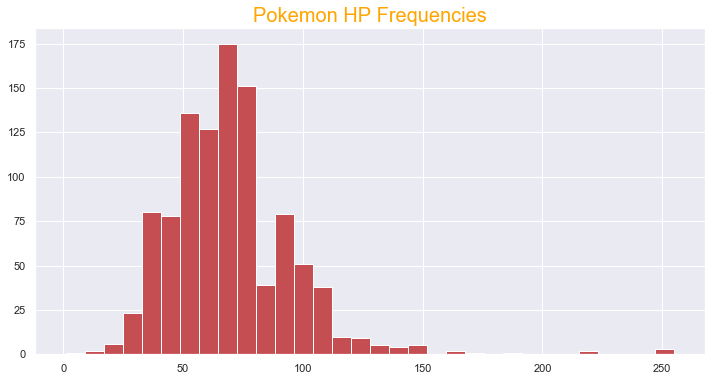

In [411]:
poke_df['HP'] = poke_df.HP.astype(int)

plt.figure(figsize=(12,6))
plt.title("Pokemon HP Frequencies", fontsize=20,color='Orange')
plt.hist(poke_df['HP'],color='r',bins=32)

**ANALYSIS<br>
HP histogram shows that most pokemon in our dataset have an HP between 25-125** 

**18. Plot a bar graph that shows the number of pokemon with each type 1 (primary) category that exists in the data.**

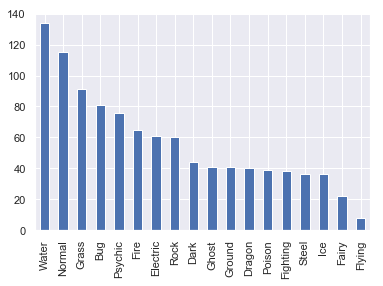

In [412]:
poke_df.Type_1.value_counts().plot.bar()

**19. Refering to the third-to-last graph above, We can observe that Ghost, Ground, and Dragon have similar amounts of pokemon. We want to see how their total stats are in comparison to each other.**

Text(0.5,1,'Ground-Dragon-Ghost Total Stats Frequencies')

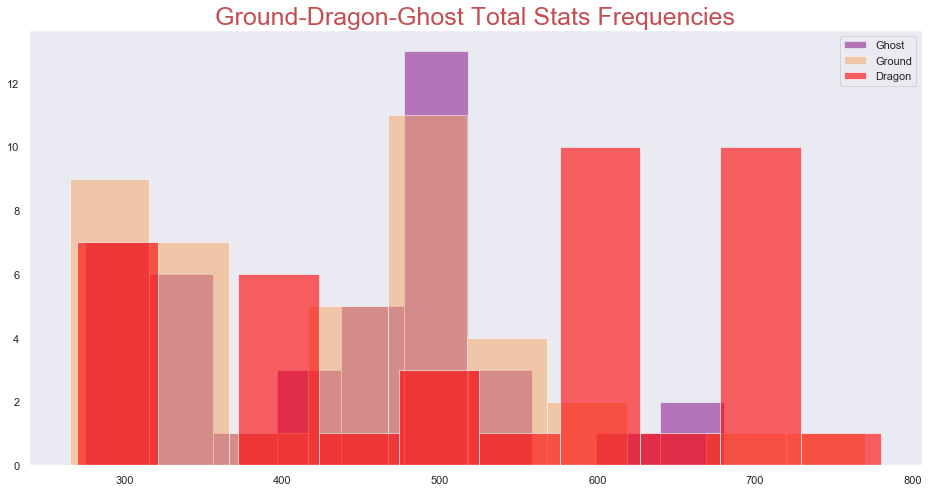

In [413]:
type_ghost = poke_df[poke_df['Type_1'] == 'Ghost']
type_ground = poke_df[poke_df['Type_1'] == 'Ground']
type_dragon = poke_df[poke_df['Type_1'] == 'Dragon']

plt.figure(figsize=(16,8))
plt.grid(False)
plt.hist(type_ghost['Total'], label='Ghost', color = 'purple', alpha=.5)
plt.hist(type_ground['Total'], label='Ground', color = 'sandybrown', alpha=.5)
plt.hist(type_dragon['Total'], label='Dragon', color = 'red', alpha=.6)
plt.legend(loc='upper right')
plt.title("Ground-Dragon-Ghost Total Stats Frequencies", fontsize=25, color='r')

**From this histogram plot we can see the Dragon type_1 holds higher values of total stats than the other two.**

**18. Plot a bar graph that shows the number of pokemon in each PURE type 1 (primary) category that exists in the data.**

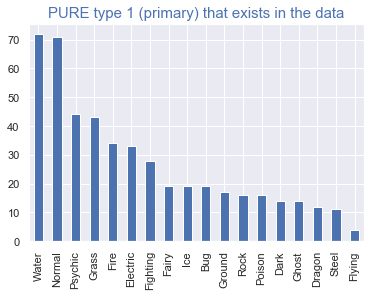

In [414]:
type2_none = poke_df[poke_df['Type_2'] == 'None']
plt.title("PURE type 1 (primary) that exists in the data", fontsize=15, color= 'b')
type2_none.Type_1.value_counts().plot.bar()

**18. Plot a bar graph that shows the number of pokemon with each type 2 (secondary) category that exists in the data.**

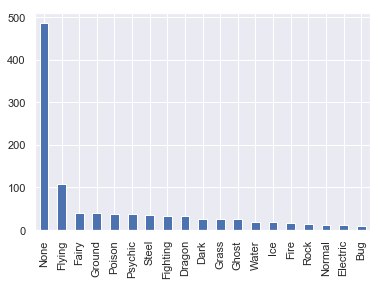

In [415]:
poke_df.Type_2.value_counts().plot.bar()

**Plot a bar graph that shows every combination of types possible in the data**

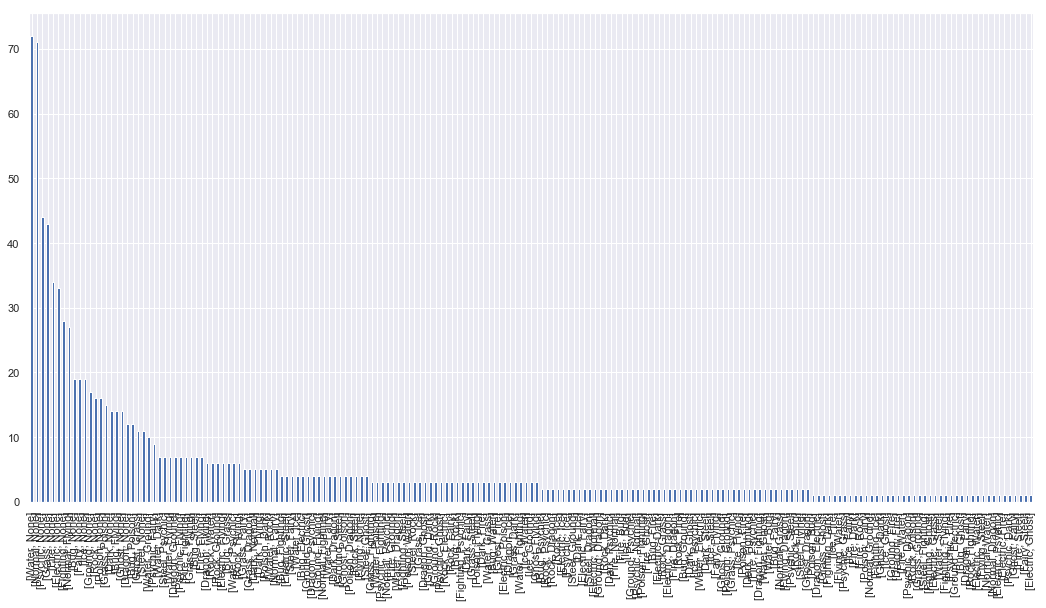

In [416]:
plt.figure(figsize=(18,9))
poke_df.Type.value_counts().plot.bar()

**20. Plot a heatmap to find the Frequency of type combinations using the two categorical data columns type_1 and type_2.**

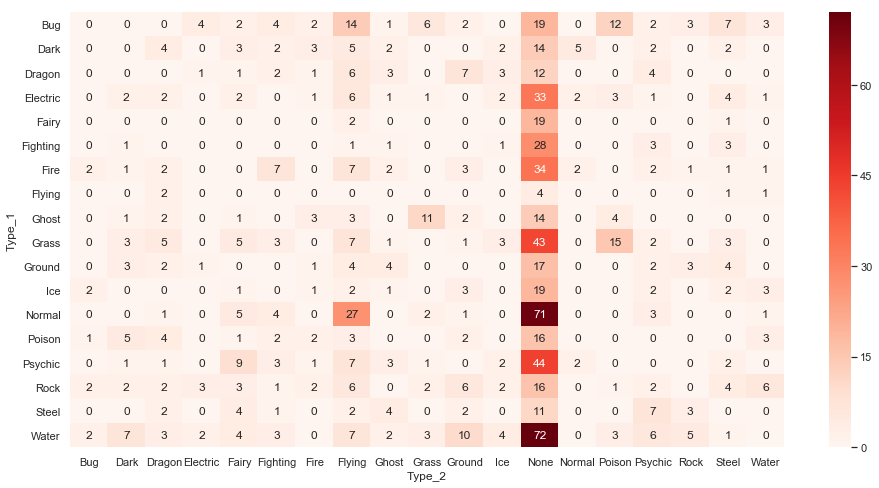

In [417]:
plt.figure(figsize=(16,8))
#flights = poke_df
type_combos = pd.pivot_table(poke_df, 
                         index="Type_1", columns="Type_2", values="Name",
                         aggfunc=lambda x: x.value_counts().count(), fill_value=0)
sns.heatmap(type_combos,cmap='Reds',annot=True, annot_kws={"size": 12})

****

**21. Refering to the heatgraph above, there appears to be one pokemon whos type is electric/fire. Retirieve the record of<br>
that pokemon.**

In [418]:
poke_df.loc[(poke_df['Type_1'] == "Electric") & (poke_df['Type_2'] == "Fire")]

,NationalNo,Name,Type,Type_1,Type_2,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Total,Stat_Avg
564,479,Rotom Heat Rotom,"[Electric, Fire]",Electric,Fire,50,65,107,105,107,86,520,86


**21. Refering to the heatgraph above, there appears to be four pokemon whos are purely flying-types. Retirieve the record of
those pokemon.**

In [419]:
poke_df.loc[(poke_df['Type_1'] == "Flying") & (poke_df['Type_2'] == "None")]

,NationalNo,Name,Type,Type_1,Type_2,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Total,Stat_Avg
740,641,Tornadus Incarnate Forme,"[Flying, None]",Flying,None,79,115,70,125,80,111,580,96
741,641,Tornadus Therian Forme,"[Flying, None]",Flying,None,79,100,80,110,90,121,580,96
951,821,Rookidee,"[Flying, None]",Flying,None,38,47,35,33,35,57,245,40
952,822,Corvisquire,"[Flying, None]",Flying,None,68,67,55,43,55,77,365,60


**22. What are the correlation between all stats? (Disregard the 'Average' Column) (Some of the columns are recognized as dtype 'object'. Convert dtype 'object' to 'int')**

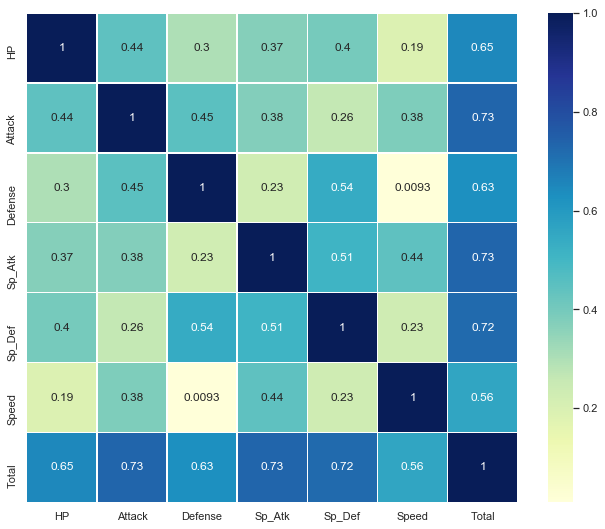

In [440]:
temp_poke_df = poke_df.drop(["Stat_Avg"], axis = 1)

#convert object types to int
temp_poke_df["HP"] = temp_poke_df["HP"].astype(str).astype(int)
temp_poke_df["Defense"] = temp_poke_df["Defense"].astype(str).astype(int)
temp_poke_df["Sp_Def"] = temp_poke_df["Sp_Def"].astype(str).astype(int)
temp_poke_df["Speed"] = temp_poke_df["Speed"].astype(str).astype(int)
temp_poke_df["Attack"] = temp_poke_df["Attack"].astype(str).astype(int)
temp_poke_df["Sp_Atk"] = temp_poke_df["Sp_Atk"].astype(str).astype(int)
temp_poke_df["Total"] = temp_poke_df["Total"].astype(str).astype(int)

corrmat = temp_poke_df.corr() 

f, ax = plt.subplots(figsize=(11, 9))

sns.heatmap(corrmat, cmap="YlGnBu",  linewidths=.5,annot=True, annot_kws={"size": 12})

**23. To see what a one-to-one correlation looks like, plot both 'Total' columns.**

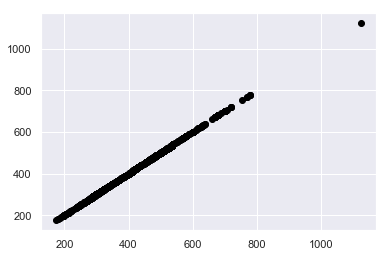

In [421]:
x = poke_df["Total"]
y = poke_df["Total"]

plt.plot(x, y, 'o', color='black')

**24. To see what two columns look like at a correlation of 73%, plot 'Total' and 'Sp.Atk' using Seaborn. By default, a linear regression fit is drawn.**

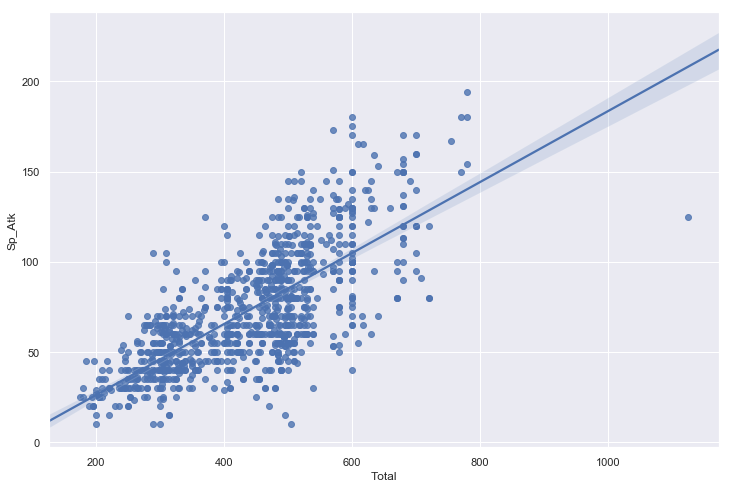

In [422]:
plt.figure(figsize=(12,8))
sns.regplot(x=temp_poke_df["Total"], y=temp_poke_df["Sp_Atk"])

**25. To see a correlation of <1%, plot 'Speed' and 'Defense'.**

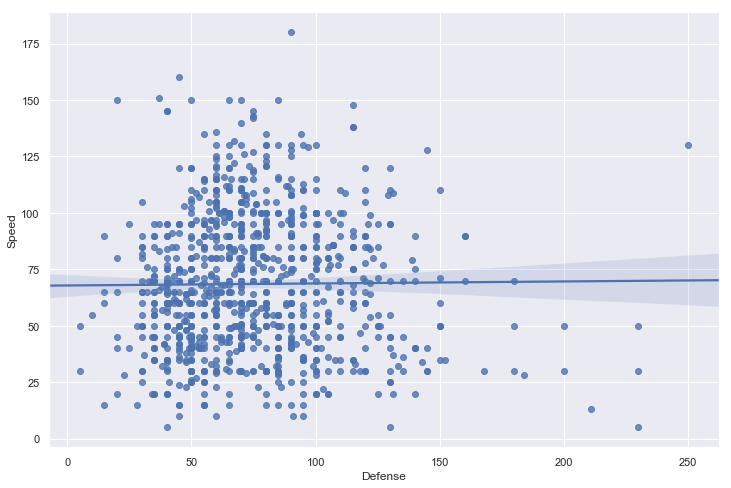

In [423]:
plt.figure(figsize=(12,8))

sns.regplot(x=temp_poke_df["Defense"], y=temp_poke_df["Speed"])

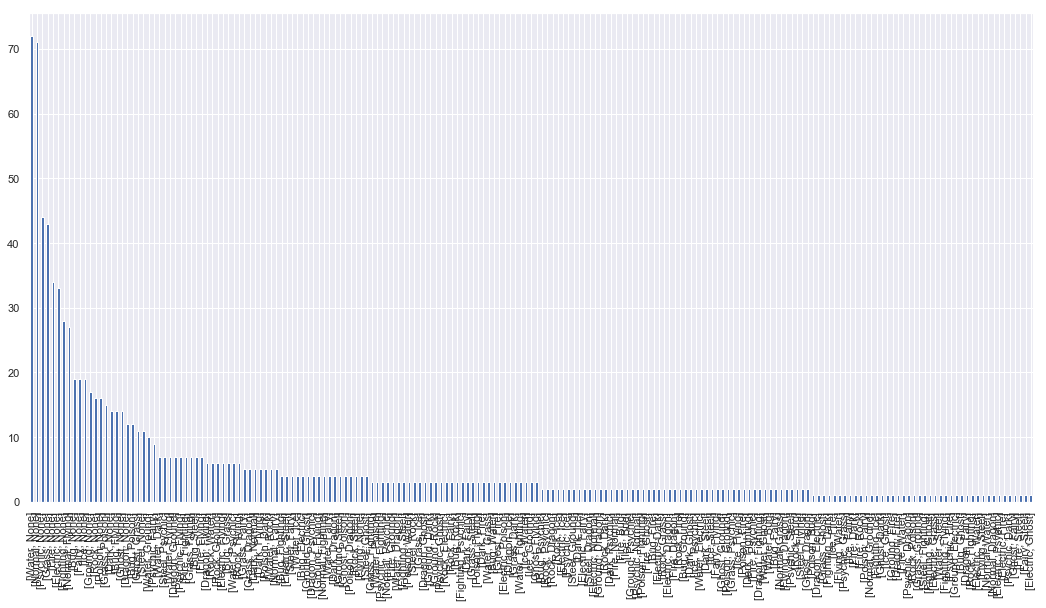

In [424]:
plt.figure(figsize=(18,9))
poke_df.Type.value_counts().plot.bar()

**Create function that takes in the name one numeric stat column and returns the average of each type of pokemon.**

In [425]:
def AverageByType1(column):
    type_fire = poke_df[poke_df['Type_1'] == 'Fire']
    type_water = poke_df[poke_df['Type_1'] == 'Water']
    type_electric = poke_df[poke_df['Type_1'] == 'Electric']
    type_grass = poke_df[poke_df['Type_1'] == 'Grass']

    type_ghost = poke_df[poke_df['Type_1'] == 'Ghost']
    type_fighting = poke_df[poke_df['Type_1'] == 'Fighting']
    type_rock = poke_df[poke_df['Type_1'] == 'Rock']
    type_dark = poke_df[poke_df['Type_1'] == 'Dark']

    type_normal = poke_df[poke_df['Type_1'] == 'Normal']
    type_fairy = poke_df[poke_df['Type_1'] == 'Fairy']
    type_psychic = poke_df[poke_df['Type_1'] == 'Psychic']
    type_steel = poke_df[poke_df['Type_1'] == 'Steel']
    type_dragon = poke_df[poke_df['Type_1'] == 'Dragon']
    
    
    AVG_type_fire = type_fire[column].mean()
    AVG_type_water = type_water[column].mean()
    AVG_type_electric = type_electric[column].mean()
    AVG_type_grass = type_grass[column].mean()

    AVG_type_ghost = type_ghost[column].mean()
    AVG_type_fighting = type_fighting[column].mean()
    AVG_type_rock = type_rock[column].mean()
    AVG_type_dark = type_dark[column].mean()

    AVG_type_normal = type_normal[column].mean()
    AVG_type_fairy = type_fairy[column].mean()
    AVG_type_psychic = type_psychic[column].mean()
    AVG_type_steel = type_psychic[column].mean()
    AVG_type_dragon = type_psychic[column].mean() 
    
    AVG_df = pd.DataFrame({'Types': ['Fire',"Water", "Electric","Grass",
                                   "Ghost","Fighting","Rock","Dark",
                                   "Normal","Fairy","Psychic","Steel","Dragon"],
                          'Averages':[ AVG_type_fire,AVG_type_water,AVG_type_electric,AVG_type_grass,
                                        AVG_type_ghost,AVG_type_fighting,AVG_type_rock,AVG_type_dark,
                                        AVG_type_normal,AVG_type_fairy,AVG_type_psychic,AVG_type_steel,AVG_type_dragon ] 
                         })
    
    return AVG_df.sort_values(by="Averages",ascending=False);

**Using the function above, find the averate Hit Points for each type and then graph it.**

In [426]:
AverageByType1(column = "HP")

,Averages,Types
8,77.052174,Normal
9,72.954545,Fairy
10,71.973684,Psychic
11,71.973684,Steel
12,71.973684,Dragon
5,71.394737,Fighting
1,70.888060,Water
0,69.430769,Fire
7,68.818182,Dark
6,67.100000,Rock


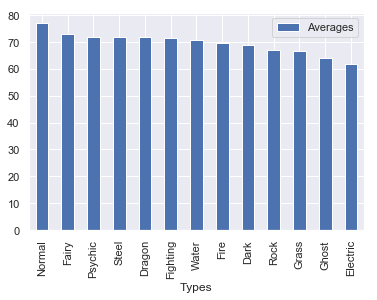

In [427]:
HPResult_df = AverageByType1(column = "HP")
HPResult_df.plot(kind='bar',x='Types',y='Averages')

**Using the function above, find the averate Attack for each type and then graph it.**

In [428]:
poke_df['Attack'] = poke_df.Attack.astype(int)
AverageByType1(column = "Attack")

,Averages,Types
5,101.263158,Fighting
6,91.783333,Rock
0,85.400000,Fire
7,81.000000,Dark
8,75.260870,Normal
1,74.992537,Water
10,74.934211,Psychic
11,74.934211,Steel
12,74.934211,Dragon
3,74.813187,Grass


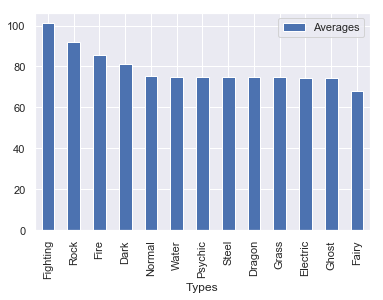

In [429]:
ATKResult_df = AverageByType1(column = "Attack")
ATKResult_df.plot(kind='bar',x='Types',y='Averages')

**Using the function above, find the average speed for each type and then graph it.**

In [430]:
poke_df['Speed'] = poke_df.Speed.astype(int)
AverageByType1(column = "Speed")

,Averages,Types
2,84.901639,Electric
10,80.592105,Psychic
11,80.592105,Steel
12,80.592105,Dragon
7,75.750000,Dark
0,74.369231,Fire
8,69.678261,Normal
5,69.210526,Fighting
1,66.335821,Water
4,61.414634,Ghost


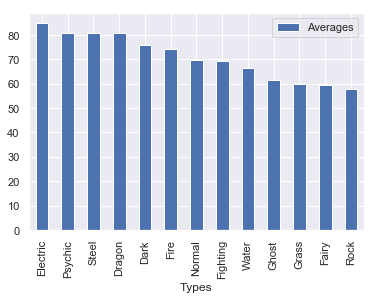

In [431]:
SPDResult_df = AverageByType1(column = "Speed")
SPDResult_df.plot(kind='bar',x='Types',y='Averages')

**Using the function above, find the average special defense for each type and then graph it.**

In [432]:
poke_df['Sp_Def'] = poke_df.Sp_Def.astype(int)
AverageByType1(column = "Sp_Def")

,Averages,Types
9,89.181818,Fairy
10,87.723684,Psychic
11,87.723684,Steel
12,87.723684,Dragon
4,78.780488,Ghost
6,72.800000,Rock
2,72.016393,Electric
1,71.395522,Water
0,71.292308,Fire
3,70.054945,Grass


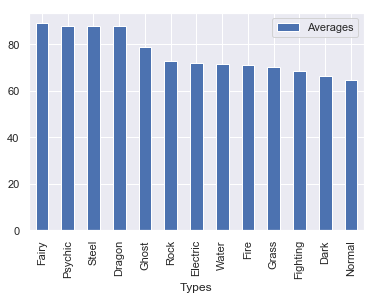

In [433]:
SPDEFResult_df = AverageByType1(column = "Sp_Def")
SPDEFResult_df.plot(kind='bar',x='Types',y='Averages')

**Using the function above, find the average stat totals for each type and then graph it.**

In [434]:
poke_df['Total'] = poke_df.Total.astype(int)
AverageByType1(column = "Total")

,Averages,Types
10,485.315789,Psychic
11,485.315789,Steel
12,485.315789,Dragon
0,455.015385,Fire
2,449.327869,Electric
6,448.683333,Rock
4,440.756098,Ghost
9,439.272727,Fairy
5,439.052632,Fighting
1,431.738806,Water


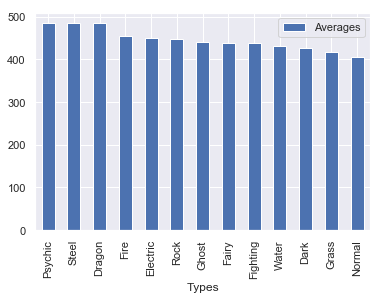

In [435]:
SPDEFResult_df = AverageByType1(column = "Total")
SPDEFResult_df.plot(kind='bar',x='Types',y='Averages')

**Using the function above, find the average stat average for each type and then graph it.**

In [436]:
poke_df['Stat_Avg'] = poke_df.Stat_Avg.astype(int)
AverageByType1(column = "Stat_Avg")

,Averages,Types
10,80.526316,Psychic
11,80.526316,Steel
12,80.526316,Dragon
0,75.446154,Fire
2,74.426230,Electric
6,74.416667,Rock
4,73.024390,Ghost
9,72.772727,Fairy
5,72.736842,Fighting
1,71.582090,Water


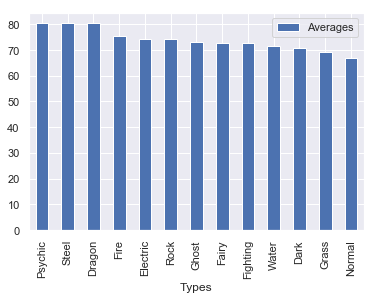

In [437]:
SPDEFResult_df = AverageByType1(column = "Stat_Avg")
SPDEFResult_df.plot(kind='bar',x='Types',y='Averages')